# Step 1: Data Cleaning

First of all import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset from .csv file
df = pd.read_csv('final_list_houses_dataset.csv')
# Having a look to the dataframe
print(df.shape)
df.head().T

(10092, 18)


,0,1,2,3,4
Unnamed: 0,0,3,4,5,6
Area [m²],123.0,255.0,234.0,219.0,156.0
Price [€],200000,698000,499000,717000,429000
state of the building,good,just renovated,as new,as new,good
number of facades,3.0,4.0,NaN,NaN,4.0
number of bedrooms,2.0,4.0,5.0,4.0,4.0
fully equipped kitchen,installed,installed,NaN,NaN,installed
furnished,no,no,NaN,no,no
open fire,NaN,NaN,NaN,NaN,NaN
locality [zip code],3294,2070,8800,8000,8800


In [3]:
# Check columns
df.columns

Index(['Unnamed: 0', 'Area [m²]', 'Price [€]', 'state of the building',
       'number of facades', 'number of bedrooms', 'fully equipped kitchen',
       'furnished', 'open fire', 'locality [zip code]',
       'surface of the land [m²]', 'terrace', 'terrace surface [m²]',
       'swimming pool', 'type of property', 'subtype of property', 'garden',
       'garden surface [m²]'],
      dtype='object')

In [4]:
# drop columns
df1 = df.drop(['Unnamed: 0',
               'fully equipped kitchen',
               'furnished','open fire',
               'terrace', 'terrace surface [m²]',
               'type of property','garden',
               'garden surface [m²]'],
               axis=1)
df1.head().T

,0,1,2,3,4
Area [m²],123.0,255.0,234.0,219.0,156.0
Price [€],200000,698000,499000,717000,429000
state of the building,good,just renovated,as new,as new,good
number of facades,3.0,4.0,NaN,NaN,4.0
number of bedrooms,2.0,4.0,5.0,4.0,4.0
locality [zip code],3294,2070,8800,8000,8800
surface of the land [m²],429.0,1210.0,744.0,760.0,419.0
swimming pool,NaN,NaN,NaN,NaN,NaN
subtype of property,house,villa,villa,house,villa


In [5]:
 # rename columns
df1.rename(columns={'Area [m²]': 'area', 
                   'Price [€]': 'price', 
                   'state of the building': 'status',
                   'number of facades': 'facades', 
                   'number of bedrooms': 'bedrooms',
                    'locality [zip code]': 'postcode',
                   'surface of the land [m²]': 'land',
                   'swimming pool': 'pool',
                   'subtype of property': 'subtype'} , 
          inplace=True)
df1.head()

,area,price,status,facades,bedrooms,postcode,land,pool,subtype
0,123.0,200000,good,3.0,2.0,3294,429.0,NaN,house
1,255.0,698000,just renovated,4.0,4.0,2070,1210.0,NaN,villa
2,234.0,499000,as new,NaN,5.0,8800,744.0,NaN,villa
3,219.0,717000,as new,NaN,4.0,8000,760.0,NaN,house
4,156.0,429000,good,4.0,4.0,8800,419.0,NaN,villa


In [6]:
# Check the main subtype properties
df1['subtype'].value_counts()*100/len(df1)

house         73.989298
villa         11.305985
mixed          3.032105
apartment      2.913199
exceptiona     2.516845
mansion        1.793500
country        1.010702
town           0.980975
bungalow       0.723345
building       0.614348
farmhouse      0.426080
manor          0.217994
other          0.168450
castle         0.168450
chalet         0.128815
land           0.009909
Name: subtype, dtype: float64

In [7]:
# Let's keep only the main subtype properties: house, villa and apartment 88.2% altogether. 
# Mixed subtype beeing unclear and therefore not relevant
condition = (df1['subtype'] == 'house') | (df1['subtype'] == 'villa') | (df1['subtype'] == 'apartment')

df1 = df1[condition]
df1['subtype'].value_counts()

house        7467
villa        1141
apartment     294
Name: subtype, dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8902 entries, 0 to 10091
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      7349 non-null   float64
 1   price     8902 non-null   object 
 2   status    6031 non-null   object 
 3   facades   6787 non-null   float64
 4   bedrooms  8850 non-null   float64
 5   postcode  8902 non-null   int64  
 6   land      8902 non-null   float64
 7   pool      293 non-null    object 
 8   subtype   8902 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 695.5+ KB


In [9]:
# As price is the target, so rows with price are not relevant.
df1 = df1[df1.price!= 'no']
# Convert price to numeric type
df1["price"] = pd.to_numeric(df1["price"])
df1.dtypes

area        float64
price         int64
status       object
facades     float64
bedrooms    float64
postcode      int64
land        float64
pool         object
subtype      object
dtype: object

### No Duplicates

In [10]:
# check duplicated rows
print('Is there any duplicated row ?: ',df1.duplicated().any())
# number of duplicated rows
print('Number of duplicated rows: ',df1.duplicated().sum())
# Having a look to duplicated rows
mask = df1.duplicated()
print('The followinf are duplicated rows:')
df1[mask]

Is there any duplicated row ?:  True
Number of duplicated rows:  315
The followinf are duplicated rows:


,area,price,status,facades,bedrooms,postcode,land,pool,subtype
238,NaN,238250,NaN,NaN,3.0,3680,238.0,NaN,house
483,135.0,275000,NaN,3.0,3.0,9600,537.0,NaN,house
564,NaN,405000,as new,2.0,4.0,2800,192.0,NaN,house
686,129.0,238000,NaN,NaN,4.0,8800,137.0,NaN,house
729,150.0,315000,as new,3.0,3.0,9600,459.0,NaN,house
...,...,...,...,...,...,...,...,...,...
9893,645.0,1050000,as new,4.0,4.0,2382,2277.0,NaN,villa
9920,146.0,249000,as new,2.0,4.0,9900,178.0,NaN,house
9927,642.0,1495000,good,NaN,3.0,8470,5924.0,NaN,villa
9978,115.0,240500,NaN,2.0,3.0,7812,312.0,NaN,house


In [11]:
# dropping duplicated rows
print('Shape with duplicates: ',df1.shape)
df1 = df1.drop_duplicates()
print('Shape without duplicates: ',df1.shape)
# re-checking duplicated rows for confirmation
print('Is there any duplicates left ?: ', df1.duplicated().any())

Shape with duplicates:  (8870, 9)
Shape without duplicates:  (8555, 9)
Is there any duplicates left ?:  False


### No NaNs

In [12]:
print('Is there any NAN ?: ', df1.isnull().any().any())
# checking  NANs or null values in each column
df1.isnull().sum()

Is there any NAN ?:  True


area        1486
price          0
status      2647
facades     1969
bedrooms      50
postcode       0
land           0
pool        8267
subtype        0
dtype: int64

In [13]:
# dropping NaNs 
df1 = df1.dropna(subset=['area', # missing area does not make sens
                         'bedrooms'],  how='any')
df1.isnull().sum()

area           0
price          0
status      1808
facades     1428
bedrooms       0
postcode       0
land           0
pool        6756
subtype        0
dtype: int64

In [14]:
# replacing NaN by 'not specified'
df1['status'].fillna('not specified', inplace=True)
# replacing NaN by 0
df1['pool'] = df1['pool'].fillna(0)
df1['pool'] = df1['pool'].replace(True, 1)
df1.isnull().sum()

area           0
price          0
status         0
facades     1428
bedrooms       0
postcode       0
land           0
pool           0
subtype        0
dtype: int64

In [15]:
df2 = df1.drop('facades', axis=1)
print('Is there any NaN value left ?: ',df2.isna().any().any())
df2.isnull().sum()

Is there any NaN value left ?:  False


area        0
price       0
status      0
bedrooms    0
postcode    0
land        0
pool        0
subtype     0
dtype: int64

In [16]:
df2.shape

(7032, 8)

### Feature engineering

In [17]:
# Add new column zone (region)
conditions = [ (1000 <= df2['postcode']) & (df2['postcode'] < 1300),
              ((1300 <= df2['postcode']) & (df2['postcode'] < 1500))| 
              ((4000 <= df2['postcode']) & (df2['postcode'] < 8000)),
              ((1500 <= df2['postcode']) & (df2['postcode'] < 4000))| 
              ((8000 <= df2['postcode']) & (df2['postcode'] < 10000))]

values = ['brussels', 'wallonia','flanders']
df2['region'] = np.select(conditions, values)
print(df2['region'].value_counts())

flanders    3897
wallonia    2702
brussels     433
Name: region, dtype: int64


Splitting data into 3 datasets according to different region

In [18]:
df_brussels = df2[df2['region'] == 'brussels']
print(df_brussels.shape)
df_brussels.head(10)

(433, 9)


,area,price,status,bedrooms,postcode,land,pool,subtype,region
45,350.0,1950000,as new,4.0,1180,265.0,0,house,brussels
64,149.0,309000,as new,2.0,1140,50.0,1,house,brussels
130,380.0,1350000,as new,7.0,1000,190.0,0,apartment,brussels
152,215.0,790000,not specified,5.0,1200,177.0,0,house,brussels
155,264.0,775000,good,5.0,1000,98.0,0,house,brussels
158,167.0,640000,good,4.0,1150,125.0,0,house,brussels
172,475.0,1775000,to be done up,7.0,1150,1195.0,0,villa,brussels
185,152.0,395000,not specified,3.0,1150,88.0,0,house,brussels
231,420.0,1290000,as new,7.0,1180,300.0,0,house,brussels
249,450.0,2750000,as new,7.0,1180,2600.0,0,villa,brussels


In [19]:
df_flanders = df2[df2['region'] == 'flanders']
print(df_flanders.shape)
df_flanders.head(10)

(3897, 9)


,area,price,status,bedrooms,postcode,land,pool,subtype,region
0,123.0,200000,good,2.0,3294,429.0,0,house,flanders
1,255.0,698000,just renovated,4.0,2070,1210.0,0,villa,flanders
2,234.0,499000,as new,5.0,8800,744.0,0,villa,flanders
3,219.0,717000,as new,4.0,8000,760.0,0,house,flanders
4,156.0,429000,good,4.0,8800,419.0,0,villa,flanders
5,140.0,279000,good,5.0,9000,85.0,0,house,flanders
13,310.0,549000,as new,3.0,2490,1389.0,0,villa,flanders
14,120.0,745000,good,3.0,3000,60.0,0,house,flanders
15,170.0,265000,good,3.0,8580,742.0,0,house,flanders
19,140.0,369000,not specified,3.0,9120,388.0,0,house,flanders


In [20]:
df_wallonia = df2[df2['region'] == 'wallonia']
print(df_wallonia.shape)
df_wallonia.head(10)

(2702, 9)


,area,price,status,bedrooms,postcode,land,pool,subtype,region
6,256.0,210000,good,4.0,7080,201.0,0,house,wallonia
8,161.0,295500,as new,4.0,5590,533.0,0,house,wallonia
9,61.0,42000,to renovate,1.0,1460,194.0,0,house,wallonia
10,160.0,229000,good,3.0,6230,480.0,0,house,wallonia
11,140.0,104500,to renovate,3.0,4031,100.0,0,house,wallonia
12,176.0,425000,as new,3.0,1400,735.0,0,house,wallonia
21,70.0,90000,not specified,2.0,7040,150.0,0,house,wallonia
22,229.0,350000,good,3.0,1420,320.0,0,house,wallonia
29,175.0,376250,as new,3.0,4607,475.0,0,house,wallonia
30,100.0,240000,good,2.0,6250,485.0,0,villa,wallonia


In [21]:
df_house = df2[df2['subtype'] == 'house']
print(df_house.shape)
df_house.head(10)

(5771, 9)


,area,price,status,bedrooms,postcode,land,pool,subtype,region
0,123.0,200000,good,2.0,3294,429.0,0,house,flanders
3,219.0,717000,as new,4.0,8000,760.0,0,house,flanders
5,140.0,279000,good,5.0,9000,85.0,0,house,flanders
6,256.0,210000,good,4.0,7080,201.0,0,house,wallonia
8,161.0,295500,as new,4.0,5590,533.0,0,house,wallonia
9,61.0,42000,to renovate,1.0,1460,194.0,0,house,wallonia
10,160.0,229000,good,3.0,6230,480.0,0,house,wallonia
11,140.0,104500,to renovate,3.0,4031,100.0,0,house,wallonia
12,176.0,425000,as new,3.0,1400,735.0,0,house,wallonia
14,120.0,745000,good,3.0,3000,60.0,0,house,flanders


In [22]:
df_villa = df2[df2['subtype'] == 'villa']
print(df_villa.shape)
df_villa.head(10)

(1027, 9)


,area,price,status,bedrooms,postcode,land,pool,subtype,region
1,255.0,698000,just renovated,4.0,2070,1210.0,0,villa,flanders
2,234.0,499000,as new,5.0,8800,744.0,0,villa,flanders
4,156.0,429000,good,4.0,8800,419.0,0,villa,flanders
13,310.0,549000,as new,3.0,2490,1389.0,0,villa,flanders
30,100.0,240000,good,2.0,6250,485.0,0,villa,wallonia
56,127.0,320000,not specified,3.0,8400,163.0,0,villa,flanders
59,430.0,995000,good,6.0,1780,1818.0,0,villa,flanders
73,625.0,695000,to be done up,5.0,9900,4143.0,0,villa,flanders
74,191.0,425000,to be done up,4.0,1860,1630.0,0,villa,flanders
98,180.0,235000,as new,4.0,1480,524.0,0,villa,wallonia


In [23]:
df_apartment = df2[df2['subtype'] == 'apartment']
print(df_apartment.shape)
df_apartment.head(10)

(234, 9)


,area,price,status,bedrooms,postcode,land,pool,subtype,region
44,129.0,175000,good,2.0,4500,120.0,0,apartment,wallonia
52,180.0,298000,not specified,5.0,7700,175.0,0,apartment,wallonia
84,115.0,275000,good,1.0,1435,153.0,0,apartment,wallonia
94,300.0,180000,to restore,6.0,4540,456.0,0,apartment,wallonia
112,380.0,445000,not specified,7.0,6690,2338.0,0,apartment,wallonia
130,380.0,1350000,as new,7.0,1000,190.0,0,apartment,brussels
170,250.0,250000,not specified,1.0,7880,649.0,0,apartment,wallonia
203,302.0,600000,just renovated,7.0,7000,100.0,0,apartment,wallonia
371,461.0,900000,as new,10.0,9600,690.0,0,apartment,flanders
381,70.0,400000,to be done up,4.0,9300,200.0,0,apartment,flanders


# Step 2: Data formatting & Model selection

### Model per region

#### Flanders properties

Train data score:  0.41438359388915
X_train shape:  (3117, 2)
y_train shape:  (3117,)
X_test shape:  (780, 2)
y_test shape:  (780,)
Test data score:  0.45724429230404917


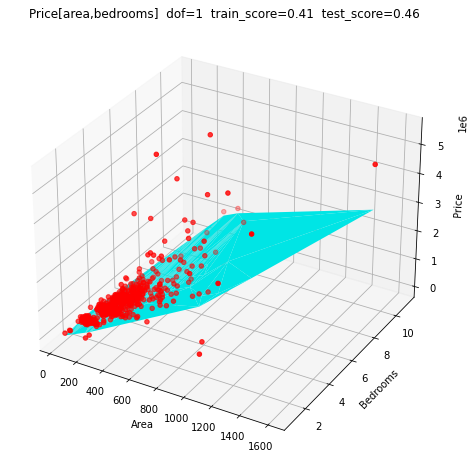

In [24]:
# To check  the score with the dof 1 between all area, bedrooms and price

X = df_flanders.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_flanders['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
#ax.view_init(elev=900,azim=90)
plt.show()

Train data score:  0.4352083405771854
X_train shape:  (3117, 2)
y_train shape:  (3117,)
X_test shape:  (780, 2)
y_test shape:  (780,)
Test data score:  0.47062407689042984


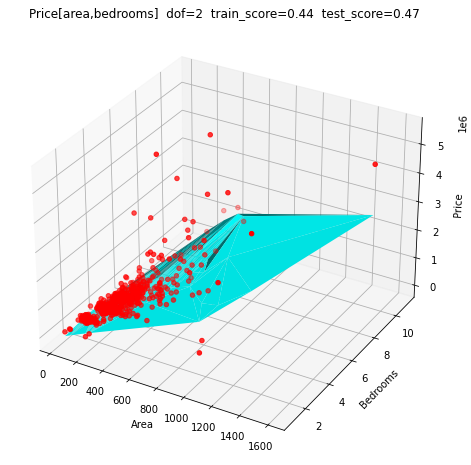

In [25]:
# To check  the score with the dof 2 between all area, bedrooms and price

X = df_flanders.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_flanders['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.465683853633164
X_train shape:  (3117, 2)
y_train shape:  (3117,)
X_test shape:  (780, 2)
y_test shape:  (780,)
Test data score:  0.5088672706964036


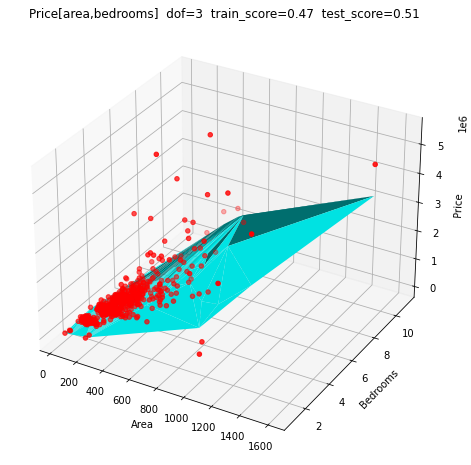

In [26]:
# To check  the score with the dof 3 between all area, bedrooms and price

X = df_flanders.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_flanders['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

#### Wallonia properties

Train data score:  0.4396622227000251
X_train shape:  (2161, 2)
y_train shape:  (2161,)
X_test shape:  (541, 2)
y_test shape:  (541,)
Test data score:  0.40142432818539586


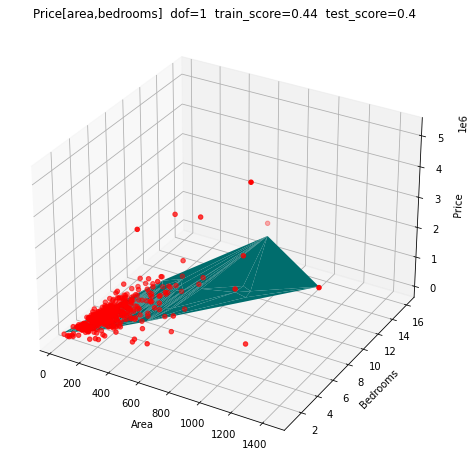

In [27]:
# To check  the score with the dof 1 between all area, bedrooms and price

X = df_wallonia.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_wallonia['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.5045638765515916
X_train shape:  (2161, 2)
y_train shape:  (2161,)
X_test shape:  (541, 2)
y_test shape:  (541,)
Test data score:  0.3978805059754731


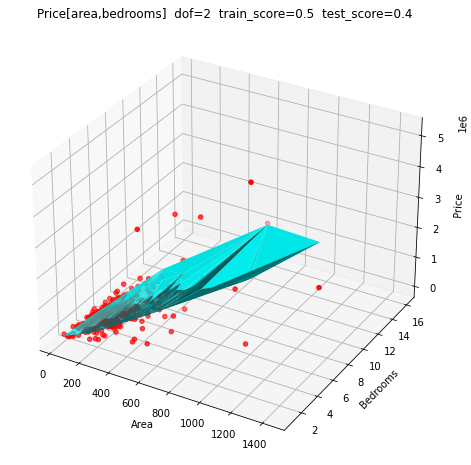

In [28]:
# To check  the score with the dof 2 between all area, bedrooms and price

X = df_wallonia.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_wallonia['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

#### Brussels properties

Train data score:  0.5913326162938275
X_train shape:  (346, 2)
y_train shape:  (346,)
X_test shape:  (87, 2)
y_test shape:  (87,)
Test data score:  0.6405713704160907


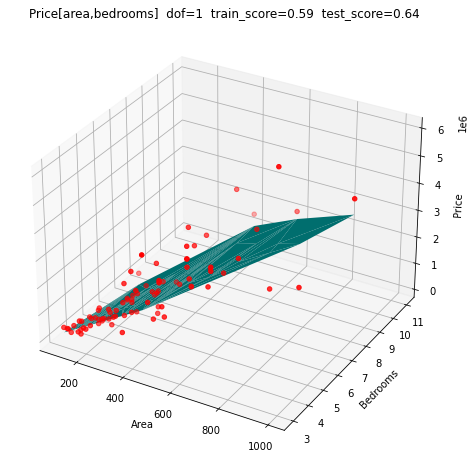

In [29]:
# To check  the score with the dof 1 between all area, bedrooms and price

X = df_brussels.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_brussels['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.6032196282658295
X_train shape:  (346, 2)
y_train shape:  (346,)
X_test shape:  (87, 2)
y_test shape:  (87,)
Test data score:  0.6409650193651376


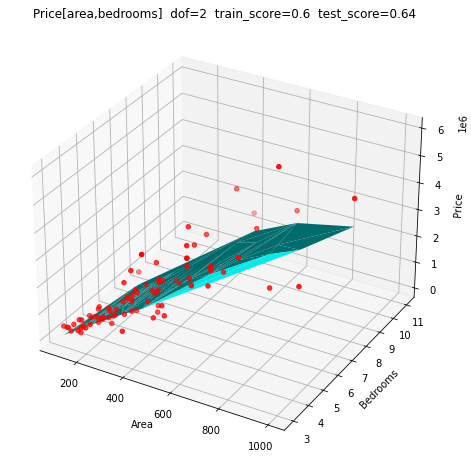

In [30]:
# To check  the score with the dof 2 between all area, bedrooms and price

X = df_brussels.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_brussels['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.6610642302970766
X_train shape:  (346, 2)
y_train shape:  (346,)
X_test shape:  (87, 2)
y_test shape:  (87,)
Test data score:  0.5906199645504677


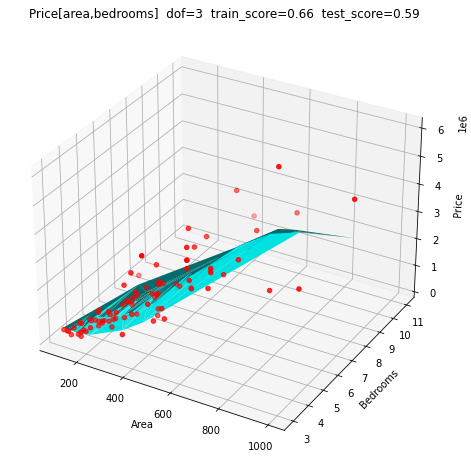

In [31]:
# To check  the score with the dof 2 between all area, bedrooms and price

X = df_brussels.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_brussels['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

### Model per property subtype

#### Houses

Train data score:  0.4146664426719251
X_train shape:  (4616, 2)
y_train shape:  (4616,)
X_test shape:  (1155, 2)
y_test shape:  (1155,)
Test data score:  0.4831600969410018


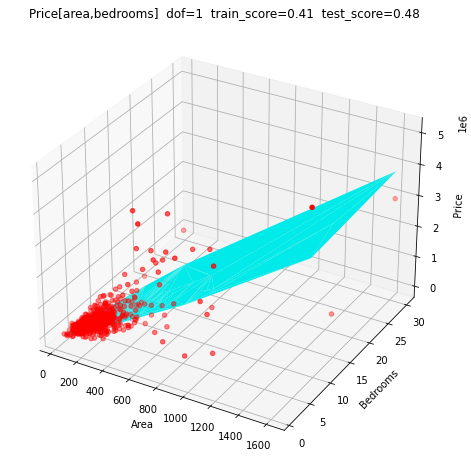

In [32]:
# To check  the score with the dof 1 between all area, bedrooms and price

X = df_house.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_house['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.44324059291890383
X_train shape:  (4616, 2)
y_train shape:  (4616,)
X_test shape:  (1155, 2)
y_test shape:  (1155,)
Test data score:  0.34068741886767584


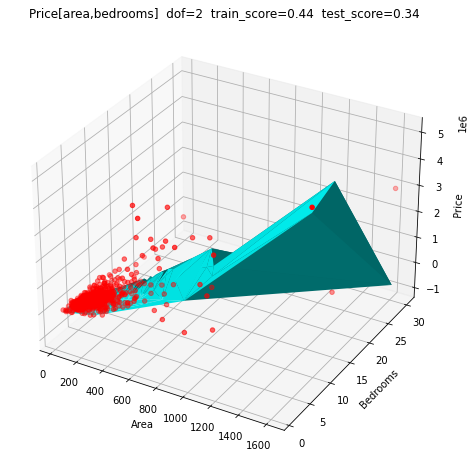

In [33]:
# To check  the score with the dof 2 between all area, bedrooms and price

X = df_house.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_house['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

#### Villa

Train data score:  0.45574678475703156
X_train shape:  (821, 2)
y_train shape:  (821,)
X_test shape:  (206, 2)
y_test shape:  (206,)
Test data score:  0.4202489727883363


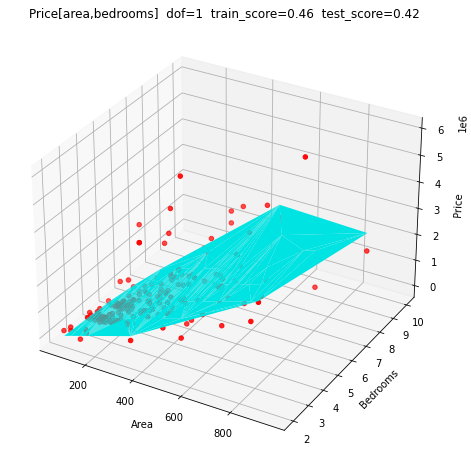

In [34]:
# To check  the score with the dof 1 between all area, bedrooms and price

X = df_villa.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_villa['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.48160016683384865
X_train shape:  (821, 2)
y_train shape:  (821,)
X_test shape:  (206, 2)
y_test shape:  (206,)
Test data score:  0.42947659851633


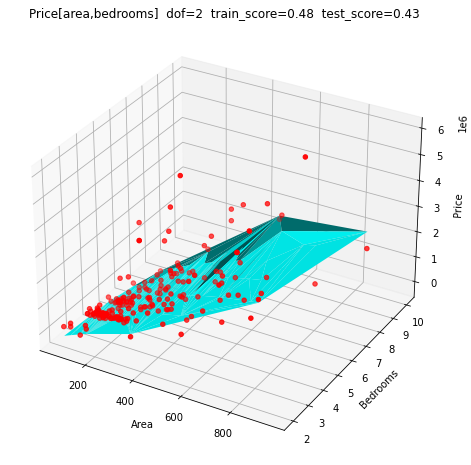

In [35]:
# To check  the score with the dof 2 between all area, bedrooms and price

X = df_villa.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_villa['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.515263354221555
X_train shape:  (821, 2)
y_train shape:  (821,)
X_test shape:  (206, 2)
y_test shape:  (206,)
Test data score:  0.44033048982989553


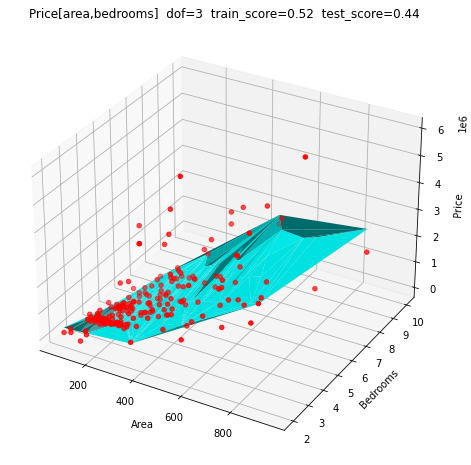

In [36]:
# To check  the score with the dof 3 between all area, bedrooms and price

X = df_villa.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_villa['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.5171079204029494
X_train shape:  (821, 2)
y_train shape:  (821,)
X_test shape:  (206, 2)
y_test shape:  (206,)
Test data score:  0.43275945869524246


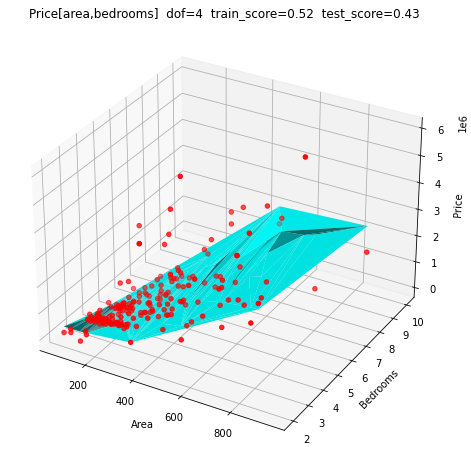

In [37]:
# To check  the score with the dof 4 between all area, bedrooms and price

X = df_villa.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_villa['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

In [38]:
#### Apartment

Train data score:  0.32229021186810547
X_train shape:  (187, 2)
y_train shape:  (187,)
X_test shape:  (47, 2)
y_test shape:  (47,)
Test data score:  0.10882348270808384


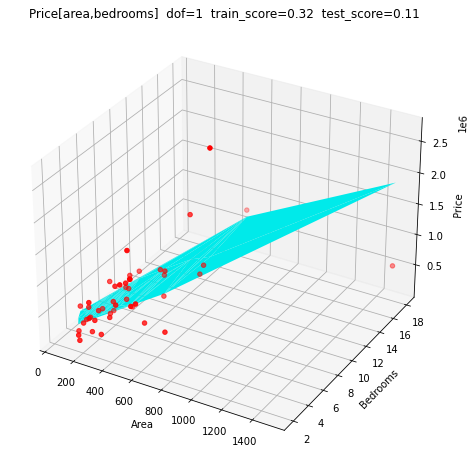

In [39]:
# To check  the score with the dof 1 between all area, bedrooms and price

X = df_apartment.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_apartment['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()

Train data score:  0.35719360311719495
X_train shape:  (187, 2)
y_train shape:  (187,)
X_test shape:  (47, 2)
y_test shape:  (47,)
Test data score:  0.03334050923769749


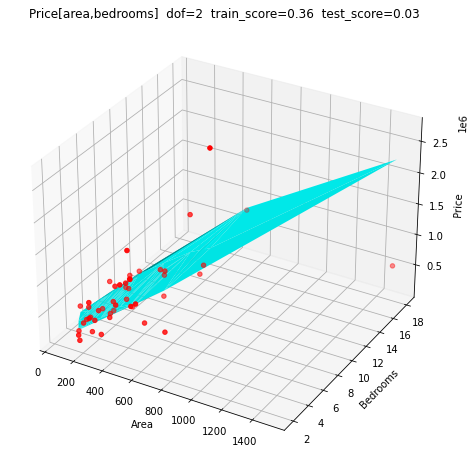

In [40]:
# To check  the score with the dof 2 between all area, bedrooms and price

X = df_apartment.drop(['price','status','postcode','land','pool','subtype','region'], axis=1).values
y = df_apartment['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,y_train)
print('Train data score: ', polyreg.score(X_train,y_train))
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Test data score: ', polyreg.score(X_test, y_test))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c='red')
ax.plot_trisurf(X_test[:,0], X_test[:,1], polyreg.predict(X_test), color='aqua')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Price[area,bedrooms]  dof='+str(degree)+
             '  train_score='+str(round(polyreg.score(X_train, y_train),2))+
             '  test_score='+str(round(polyreg.score(X_test, y_test),2)))
plt.show()